# Analyze the Impact of Reviews on AirBnB Listing Prices in New York City

## Table of Contents

## Introduction

This project delves into the multifaceted Airbnb landscape of New York City using the New York City Airbnb Open Data obtained from Kaggle. This dataset includes information about hosts, geographic locations, review metrics, availability, and other features of AirBnB listings in New York City, providing a brief overview of the different aspects of NYC AirBnB listings. With AirBnB prices being unpredictable and widely varied in our current complex housing and rental market, it is crucial to explore factors determining AirBnB hosts' pricing strategy. Utilising more than 50,000 available data points, I aim to analyze the determinants of AirBnB listing prices, mainly the impact of reviews on AirBnB listing prices.

For the purpose of answering my research question, I have chosen 5 key variables that can influence AirBnB listing prices, including Amount of Nights Minimum, Number of Reviews, Number of Reviews per Month, Amount of Listing per Host, Listing Availability per Year. These variables play an important role in analyzing AirBnB prices, as they deter short-term guests, which can lead to higher prices to compensate for potential vacancies; popularity and guest satisfaction, which enable hosts to charge more due to perceived higher value; consistent guest turnover and sustained interest due to frequent reviews, which can correlate with the ability to maintain higher prices; hosts with multiple listings that might have more experience and a stronger presence in the market, which could influence their pricing strategy; and whether a property is a full-time rental, which might demand higher prices due to dedicated maintenance and professional management. This multifaceted approach aligns with the research question by presenting how the interplay between host strategies, listing characteristics, and consumer feedback reflected in reviews impacts listing prices.

The findings of my study can be beneficial to the AirBnB market, helping to understand how guest feedback influences the perceived value and, consequently, the pricing strategy of rental properties. Reviews can serve as a quality signal to potential guests; positive reviews may allow hosts to charge more due to increased demand, while negative reviews might necessitate lower prices to attract bookings. This analysis seeks to investigate the relationship between reviews and listing prices, offering insights for hosts to optimise their pricing strategy in the competitive Airbnb marketplace.

## Data Cleaning/Loading

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read csv file
df = pd.read_csv('AB_NYC_2019.csv')

# First 5 rows of dataframe
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# Check data types of each column
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
# Drop rows with missing values
df.dropna(inplace=True)
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


In [6]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)
df
# In my cleaned dataset, there's no duplicate rows

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


## Summary Statistics Tables

In [7]:
sum_stats = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                'calculated_host_listings_count', 'availability_365']].describe()

sum_stats = sum_stats.rename(columns={
    'price': 'Price (USD) ',
    'minimum_nights': 'Amount of Nights Minimum',
    'number_of_reviews': 'Number of Reviews',
    'reviews_per_month': 'Number of Reviews per Month',
    'calculated_host_listings_count': 'Amount of Listing per Host',
    'availability_365': 'Listing Availability per Year (days)'})

sum_stats_styled = sum_stats.style.set_caption("<h1><b>Summary Statistics for Airbnb Listings and Metrics")
sum_stats_styled

,Price (USD),Amount of Nights Minimum,Number of Reviews,Number of Reviews per Month,Amount of Listing per Host,Listing Availability per Year (days)
count,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Interpretation

These summary statistics provide valuable insights into the AirBnB listings, including the key metrics: Price, Amount of Nights Minimum, Number of Reviews, Number of Reviews per Month, Amount of Listing per Host, Listing Availability per Year. The means provide the average numbers of these key metrics, giving an overview of a typical AirBnB listing's performance for future comparisons between AirBnB listings. The maximums and minimums indicate that there are multiple outliers in this dataset that might skew the results, such as the Amount of Nights Minimum variable, where the minimum stay required is 1 night and the maximum stay required is a highly unusual 1250 nights. 

## Plots, Histograms, Figures


### Distribution of Listings Across Neighbourhood Groups and Room Types

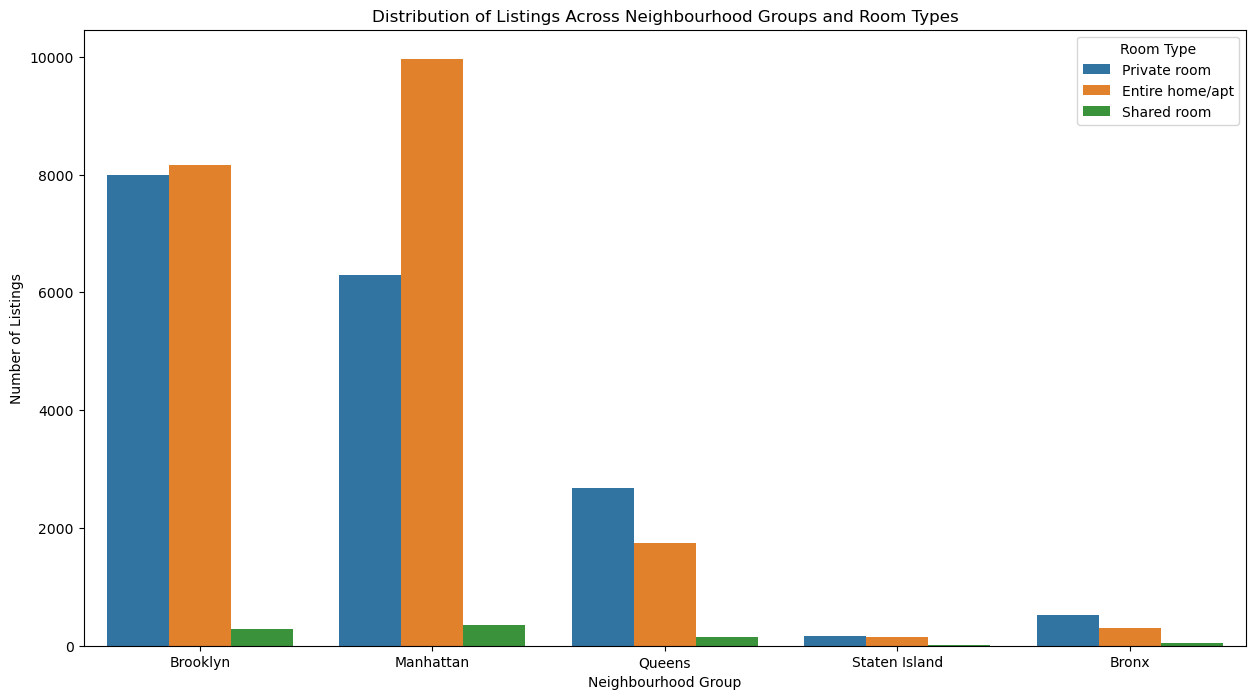

In [8]:
# This will make a countplot with 'neighbourhood_group' on the x-axis, and color-code ('hue') the 'room_type' categories
plt.figure(figsize=(15, 8))
sns.countplot(x='neighbourhood_group', hue = 'room_type', data=df)

# Adding the title and labels
plt.title('Distribution of Listings Across Neighbourhood Groups and Room Types')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')

# Show the legend
plt.legend(title='Room Type')

# Show the plot
plt.show()

### Interpretation

This plot shows the distribution of listings across neighbourhood groups and room types. In all neighbourhood groups, shared rooms are the least popular room type, with entire homes, apartments, and private rooms dominating the AirBnB market. Brooklyn and Manhattan are the most popular neighbourhood groups with the highest listings, while Staten Island is the least popular, which can be due to higher demand in more popular tourist destinations. We can observe a more balanced distribution between the entire home, apartment, and private room in Brooklyn compared to Manhattan. Overall, this plot is useful for understanding the room type and geographical distribution of AirBnB in NYC and identifying the growing areas for AirBnB.

### Average AirBnB Price and Average Reviews per Month Across Neighbourhood Groups and Room Types 

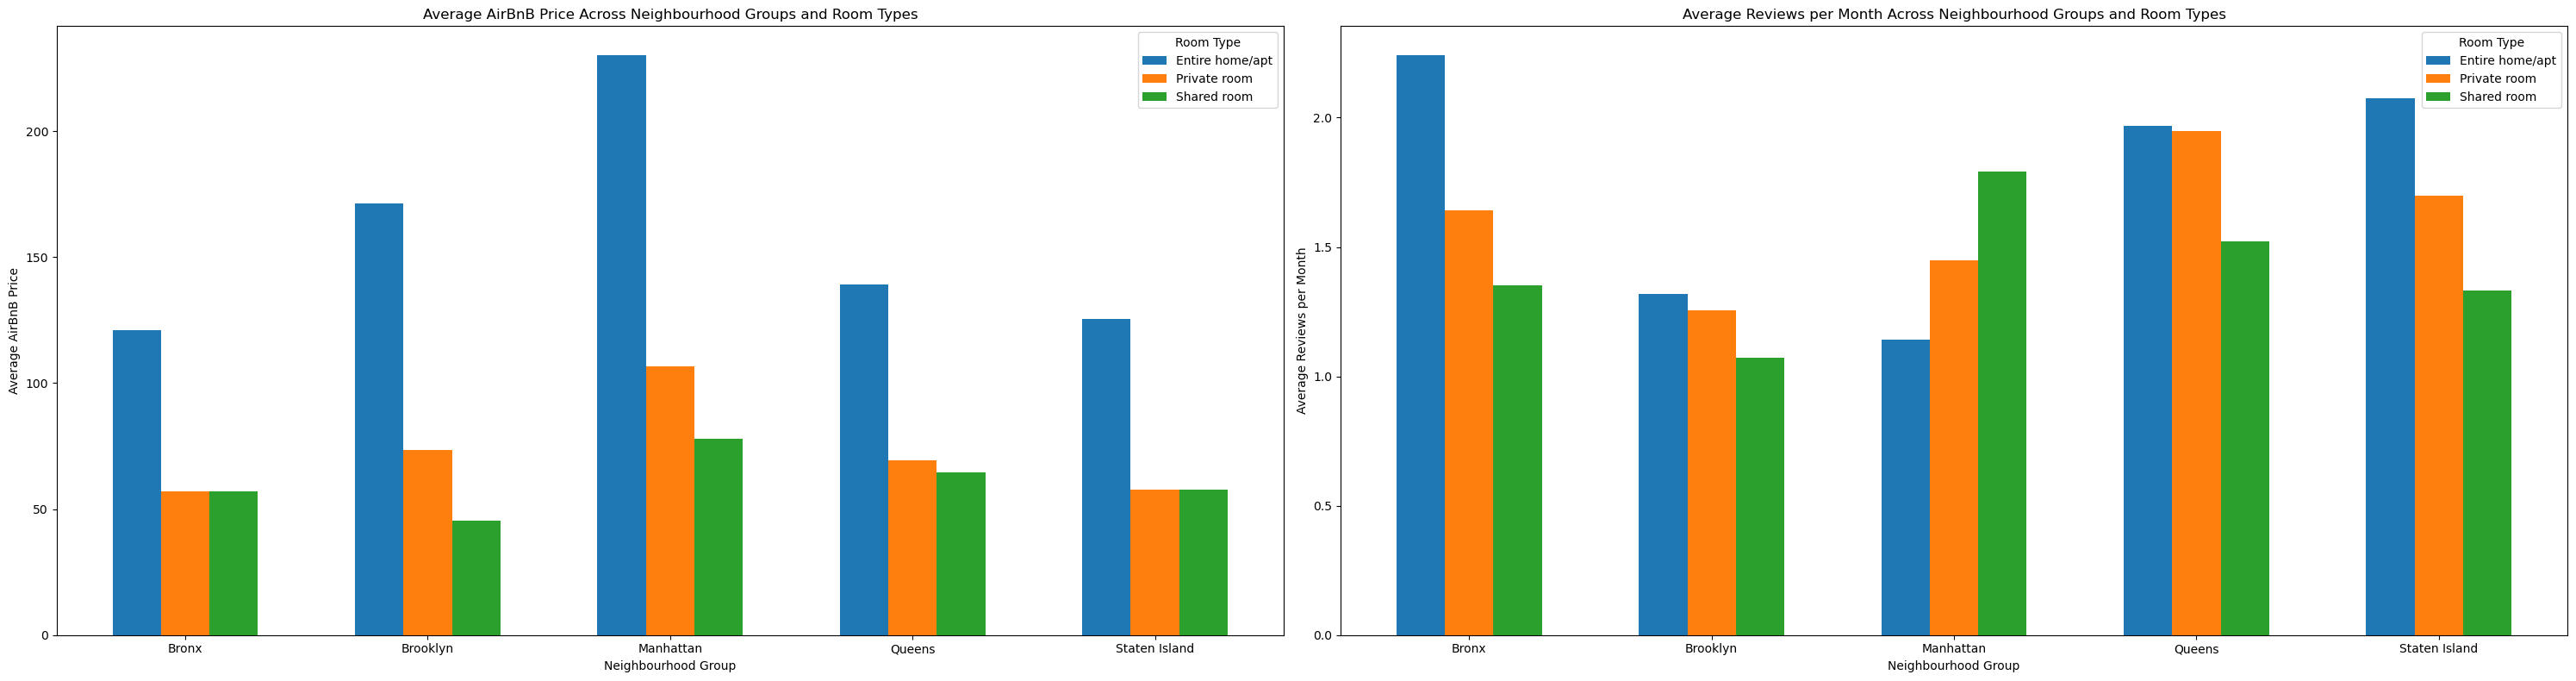

In [9]:
# Set up the matplotlib figure with a certain size
fig, axes = plt.subplots(1, 2, figsize=(30, 8))  # 1 row, 2 columns

# First plot - Average AirbnB Price Across Neighbourhood Group and Room Type
grouped_prices = df.groupby(['neighbourhood_group', 'room_type'])['price'].mean().unstack()
bar_width = 0.2
indices = range(len(grouped_prices))
room_types = grouped_prices.columns.values
n_room_types = len(room_types)

for i, room_type in enumerate(room_types):
    axes[0].bar([x + (i * bar_width) for x in indices], 
           grouped_prices[room_type], 
           width=bar_width, 
           label=room_type)

axes[0].set_xticks([x + (bar_width * (n_room_types / 2 - 0.5)) for x in indices])
axes[0].set_xticklabels(grouped_prices.index)
axes[0].set_xlabel('Neighbourhood Group')
axes[0].set_ylabel('Average AirBnB Price')
axes[0].set_title('Average AirBnB Price Across Neighbourhood Groups and Room Types')
axes[0].legend(title='Room Type')

# Second plot - Average Reviews per Month Across Neighbourhood Group and Room Type
grouped_reviews = df.groupby(['neighbourhood_group', 'room_type'])['reviews_per_month'].mean().unstack()

for i, room_type in enumerate(room_types):
    axes[1].bar([x + (i * bar_width) for x in indices], 
           grouped_reviews[room_type], 
           width=bar_width, 
           label=room_type)

axes[1].set_xticks([x + (bar_width * (n_room_types / 2 - 0.5)) for x in indices])
axes[1].set_xticklabels(grouped_reviews.index)
axes[1].set_xlabel('Neighbourhood Group')
axes[1].set_ylabel('Average Reviews per Month')
axes[1].set_title('Average Reviews per Month Across Neighbourhood Groups and Room Types')
axes[1].legend(title='Room Type')

# Adjust the layout
plt.tight_layout()

# Show the combined plot
plt.show()

### Interpretation

The first plot shows the average AirBnB price across neighbourhood groups and room types. An entire home or apartment is the most expensive, with prices ranging from \\$140/night to \\$250/night, due to the added value of privacy, space, and amenities. Meanwhile, private and shared rooms are less expensive with a smaller price gap, ranging from \\$40/night to \\$110/night. Manhattan has the highest average prices for all three types of rooms, reflecting its status as a prime location with high demand for accommodation. Brooklyn comes in second for high average prices, followed by Queens, Bronx, and Staten Island with similar price ranges. This plot is useful for illustrating the price points, which reflect the demand and attractiveness in different areas. 

The second plot shows the average reviews per month across neighbourhood groups and room types. Surprisingly, the less popular areas—Bronx, Queens, and Staten Island—receive a higher number of reviews than the more popular areas—Brooklyn and Manhattan. We can observe that customers are more inclined to leave reviews for entire homes or apartments compared to private and shared rooms. This plot is useful for providing insights into customer engagement and satisfaction and analysing customer activity across neighbouring groups. 

Both plots together provide a comprehensive overview of the pricing and popularity of Airbnb listings in New York City's various neighbourhoods.

### Histograms for Price, Amount of Nights Minimum, Number of Reviews, Number of Reviews per Month, Amount of Listing per Host, Listing Availability per Year

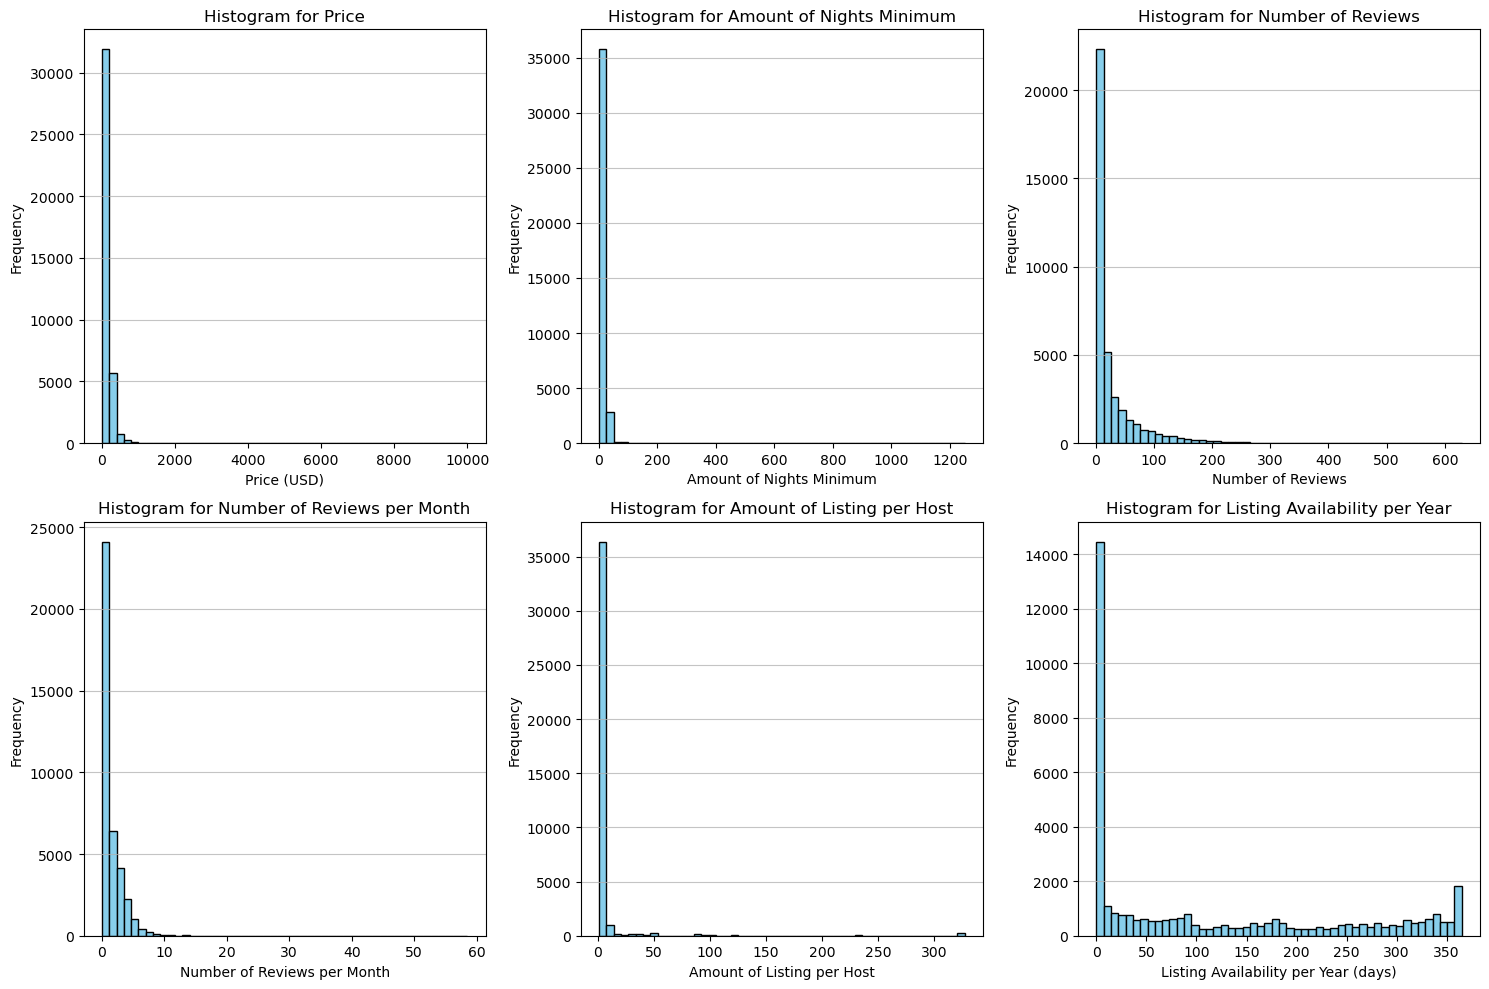

In [10]:
# Create one figure with six subplots (2 rows, 3 columns)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # Adjust the overall figure size as needed

# Histogram for price
axs[0, 0].hist(df['price'], bins=50, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Histogram for Price')
axs[0, 0].set_xlabel('Price (USD)')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].grid(axis='y', alpha=0.75)

# Histogram for minimum nights
axs[0, 1].hist(df['minimum_nights'], bins=50, color='skyblue', edgecolor='black')
axs[0, 1].set_title('Histogram for Amount of Nights Minimum')
axs[0, 1].set_xlabel('Amount of Nights Minimum')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].grid(axis='y', alpha=0.75)

# Histogram for number of reviews
axs[0, 2].hist(df['number_of_reviews'], bins=50, color='skyblue', edgecolor='black')
axs[0, 2].set_title('Histogram for Number of Reviews')
axs[0, 2].set_xlabel('Number of Reviews')
axs[0, 2].set_ylabel('Frequency')
axs[0, 2].grid(axis='y', alpha=0.75)

# Histogram for reviews per month
axs[1, 0].hist(df['reviews_per_month'], bins=50, color='skyblue', edgecolor='black')
axs[1, 0].set_title('Histogram for Number of Reviews per Month')
axs[1, 0].set_xlabel('Number of Reviews per Month')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].grid(axis='y', alpha=0.75)

# Histogram for host listings count
axs[1, 1].hist(df['calculated_host_listings_count'], bins=50, color='skyblue', edgecolor='black')
axs[1, 1].set_title('Histogram for Amount of Listing per Host')
axs[1, 1].set_xlabel('Amount of Listing per Host')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].grid(axis='y', alpha=0.75)

# Histogram for availability
axs[1, 2].hist(df['availability_365'], bins=50, color='skyblue', edgecolor='black')
axs[1, 2].set_title('Histogram for Listing Availability per Year')
axs[1, 2].set_xlabel('Listing Availability per Year (days)')
axs[1, 2].set_ylabel('Frequency')
axs[1, 2].grid(axis='y', alpha=0.75)

# Adjust layout for better readability
plt.tight_layout()
plt.show()

### Interpretation

These histograms represent the distribution of my Y and X variables: including Price, Amount of Nights Minimum, Number of Reviews, Number of Reviews per Month, Amount of Listing per Host, Listing Availability per Year. Overall, most histograms show a right-skewed distribution, except for the Amount of Listing histogram and the Availability histogram. The Amount of Listing histogram indicates that most hosts have only a few listings (less than 5), with the sudden spike of some hosts having more than 300 listings. The Availability histogram has a more varied pattern, with a significant number of listings available for many days of the year, but also a good number with limited availability. 

### Histograms for Price, Amount of Nights Minimum, Number of Reviews, Number of Reviews per Month, Amount of Listing per Host, Listing Availability per Year (Outliers Removed)

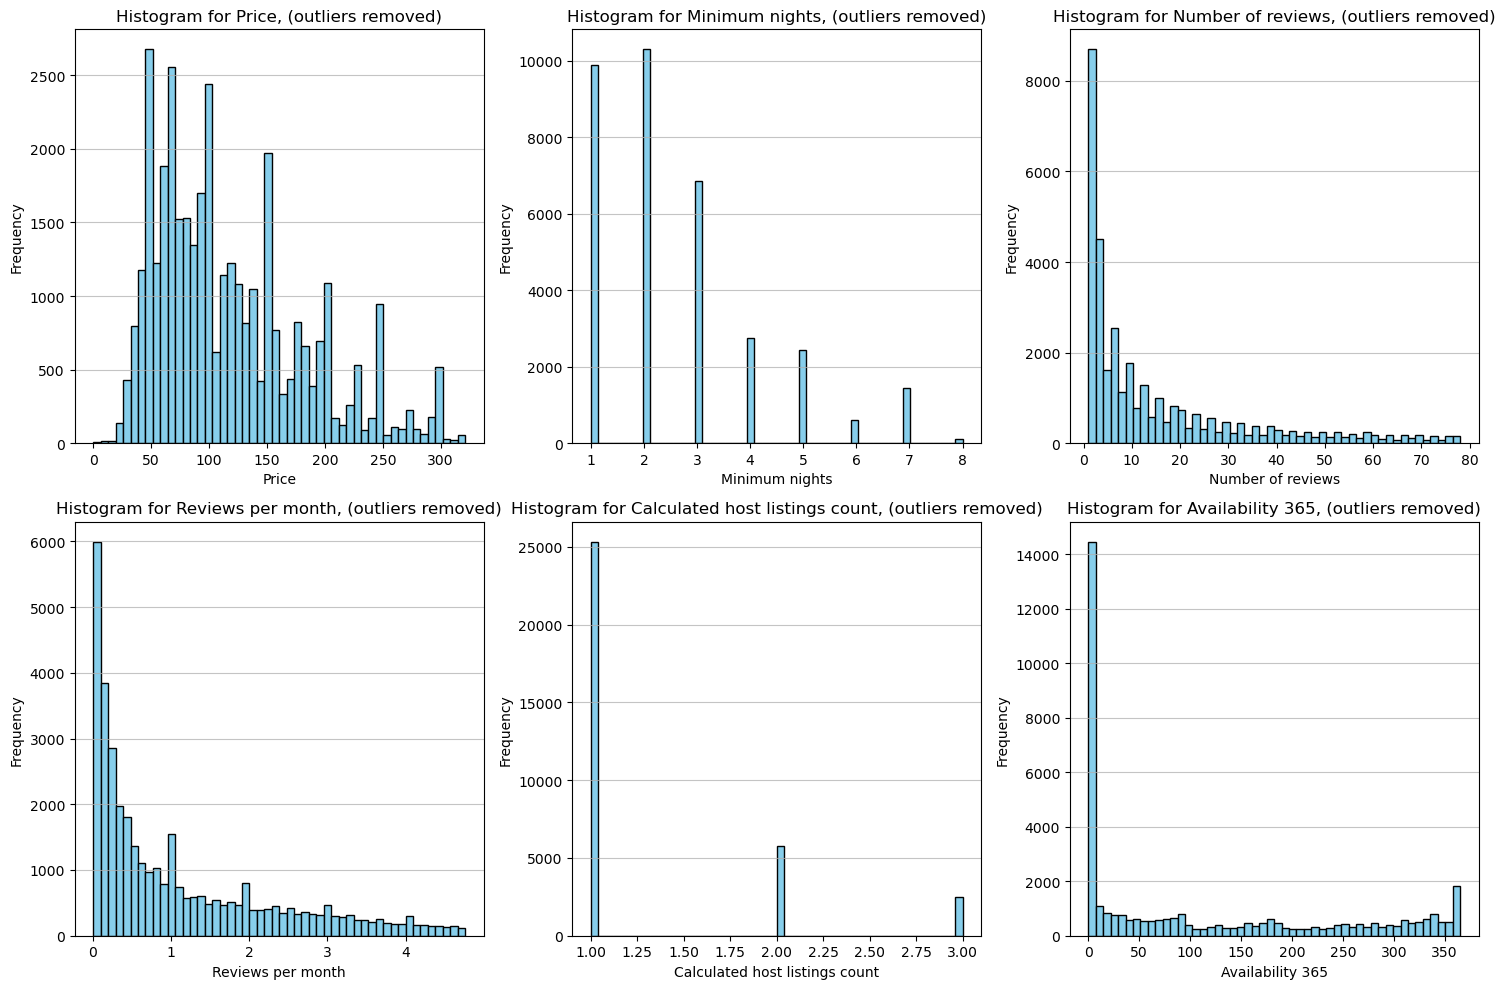

In [11]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# List of variables to plot
variables = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
             'calculated_host_listings_count', 'availability_365']

# Remove outliers from all variables
cleaned_data = {var: remove_outliers(df, var) for var in variables}

# Create one figure with six subplots (2 rows, 3 columns)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plotting histograms for each variable without outliers
for ax, var in zip(axs.flat, variables):
    ax.hist(cleaned_data[var][var], bins=50, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram for {var.capitalize().replace("_", " ")}, (outliers removed)')
    ax.set_xlabel(var.capitalize().replace("_", " "))
    ax.set_ylabel('Frequency')
    ax.grid(axis='y', alpha=0.75)

# Adjust layout for better readability
plt.tight_layout()
plt.show()

### Interpretation

For visualization purposes, I have removed outliers to get rid of the extreme values that can skew the interpretation and to present a clearer distribution of the variables.

**Price Histogram**: This histogram is lightly right-skwed, with distribution of prices concentrated at the lower price range (mostly //$150/night and under), and fewer listings at higher prices. This suggests that most AirBnB listings are relatively affordable, except for those luxury rentals with higher price range.

**Minimum Nights Histogram**: This histogram is lightly right-skewed, showing a higher frequency of listings requiring only a few nights' stay (mostly 3 nights and under), and fewer listings requiring longer stay. This suggests that short-term rental is more common and that customers mostly book AirBnB for travel purposes.

**Number of Reviews Histogram**: This histogram is heavily right-skewed, with most listings having a low to moderate number of reviews (ranging from 0 to 35 reviews), and very few listings having more than 50 reviews. This suggests that most listings receive low number of reviews and have low customer engagement. 

**Reviews per Month Histogram**: This histogram is heavily right-skewed, with most listings receive less than 3 reviews per month. This either suggests a low turnover rate or a low popularity. 

**Amount of Listing Histogram**: This histogram shows that the majority of hosts have only a few listings, however, with outliers removed, the sudden spike of some hosts having more than 300 listings is not shown. This suggests that the Airbnb market is likely dominated by hosts who are not professional or commercial landlords.

**Availability Histogram**: This histogram has varied distribution, with listings having both low and high availability. Listings with low availability can be due to part-time or seasonal rentals.

These histograms are useful for understanding the dynamics of the Airbnb market, such as pricing strategies, listing popularity, and host activity.

### Relationship between Price and Amount of Nights Minimum, Number of Reviews, Number of Reviews per Month, Amount of Listing per Host, Listing Availability per Year

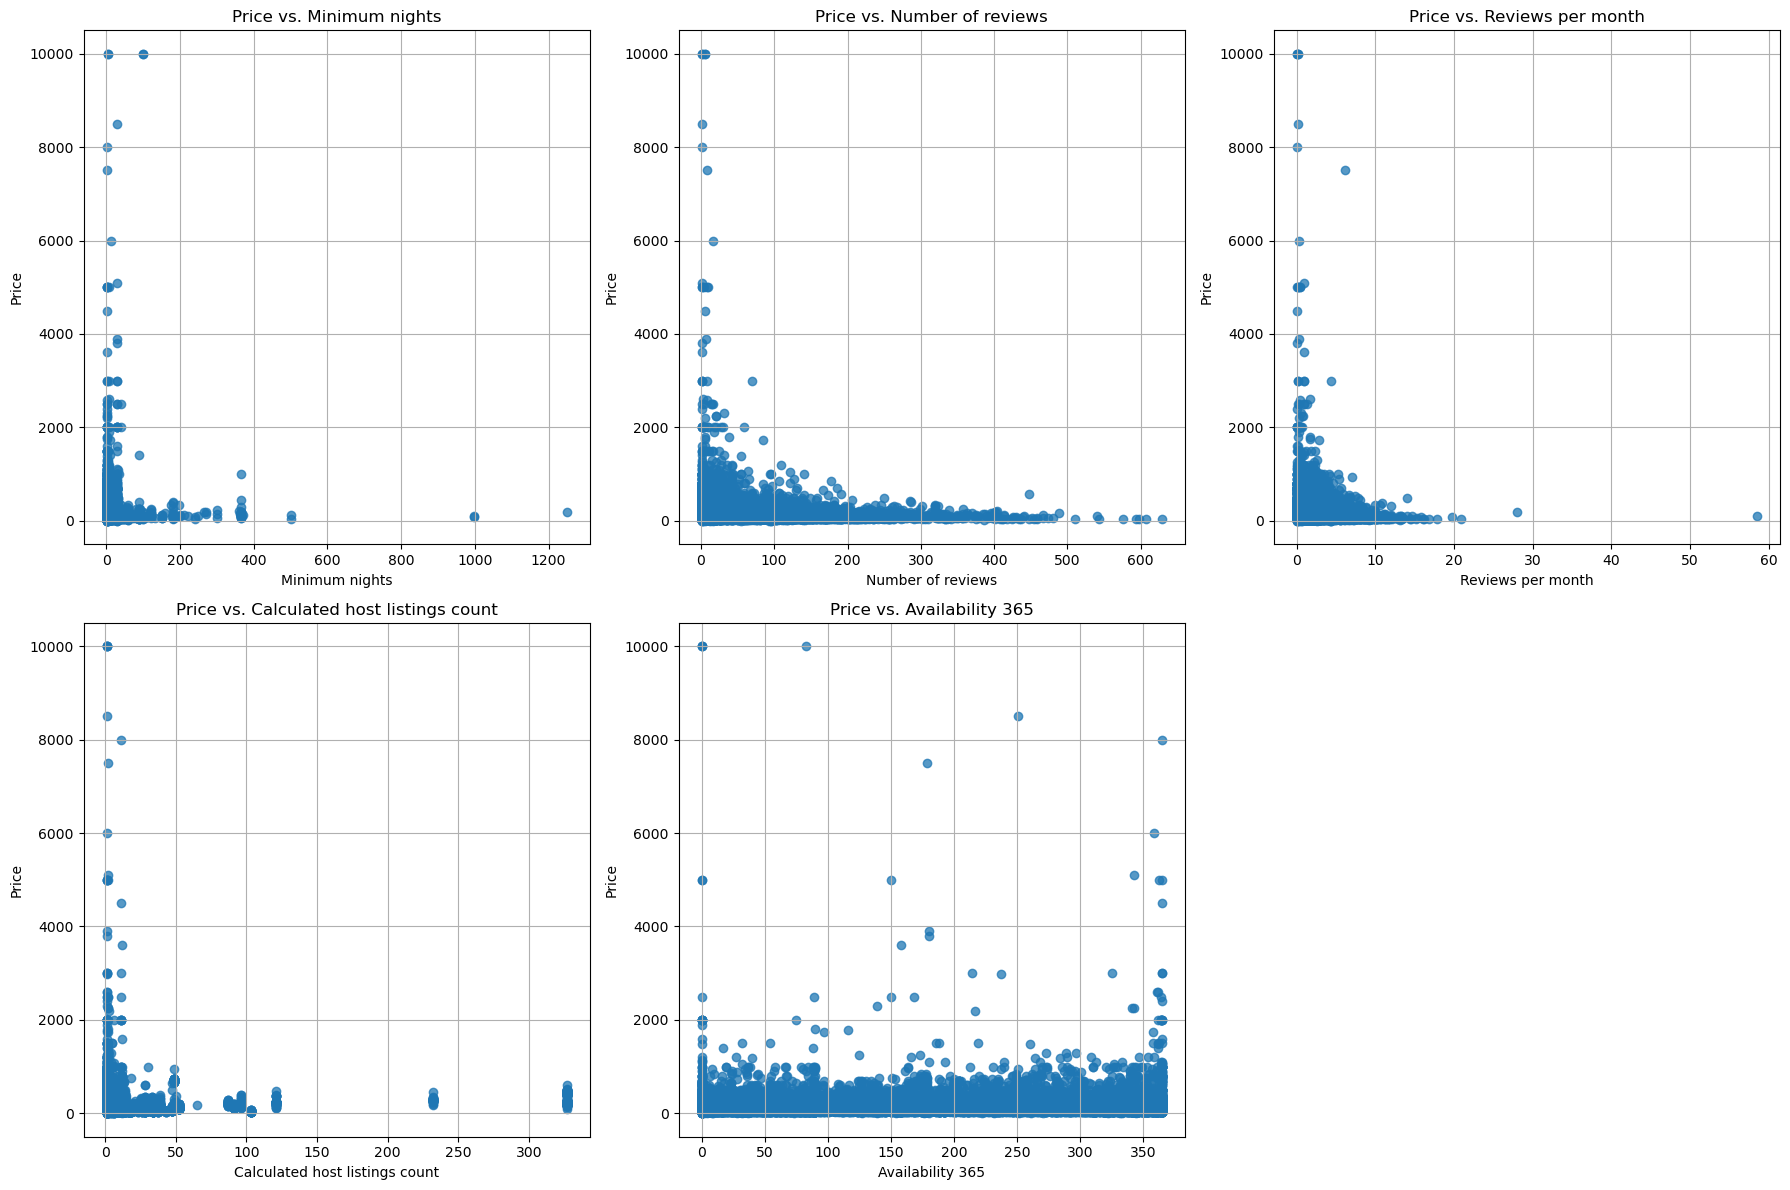

In [12]:
x_variables = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Create one figure with subplots arranged in a 2x3 grid
fig, axs = plt.subplots(2, 3, figsize=(18, 12))  # Adjust the overall figure size as needed

# Plotting each variable against price in the grid
for i, ax in enumerate(axs.flat):
    if i < len(x_variables):  # Check to ensure we don't go out of range
        ax.scatter(df[x_variables[i]], df['price'], alpha=0.75)
        ax.set_title(f'Price vs. {x_variables[i].replace("_", " ").capitalize()}')
        ax.set_xlabel(x_variables[i].replace("_", " ").capitalize())
        ax.set_ylabel('Price')
        ax.grid(True)
    else:
        ax.set_visible(False)  # Hide unused subplot

plt.tight_layout()
plt.show()

### Interpretation

**Price vs. Minimum Nights**: This scatter plot shows that there's no strong relationship between price and minimum nights. A large number of listings are clustered around the lower end of both axes, indicating that listings with lower prices tend to have shorter minimum stays.

**Price vs. Number of Reviews**: This scatter plot shows that there's no strong relationship between price and number of reviews. Most listings with lower prices seem to have a higher number of reviews, which might suggest that more affordable listings are booked more often, leading to a higher number of reviews.

**Price vs. Reviews per Month**: This scatter plot shows that there's no strong relationship between price and reviews per month. A large number of listings are clustered around the lower end of both axes, in the lower price range, with fewer reviews per month.

**Price vs. Amount of Listing**: This scatter plot shows that there's no relationship between price and the number of listings. It appears that hosts with a greater number of listings do not necessarily charge higher prices. Most listings are clustered towards hosts with fewer listings and lower prices.

**Price vs. Availability**: This scatter plot shows that there's no relationship between price and availability.The distribution of points does not indicate a clear relationship between the price and the number of days a listing is available throughout the year. Listings with lower prices seem to have varied availability, from very low to very high.

Overall, these scatter plots show that there are no strong relationships between Price and Amount of Nights Minimum, Number of Reviews, Number of Reviews per Month, Amount of Listing per Host, Listing Availability per Year. I have tried to use log and remove outliers, but still found no relationship. In this dataset, the majority of the listings are concentrated at the lower end of the price range, with very few listings with higher prices. The lack of strong linear relationships in these scatter plots suggests that the existing factors in this dataset might not be as impactful on AirBnB prices. There might be more influential factors not captured in this dataset that can impact AirBnB prices, such as location, property size, and amenities, which can be discovered further in later projects.

### Correlation Matrix of Price, Amount of Nights Minimum, Number of Reviews, Number of Reviews per Month, Amount of Listing per Host, Listing Availability per Year

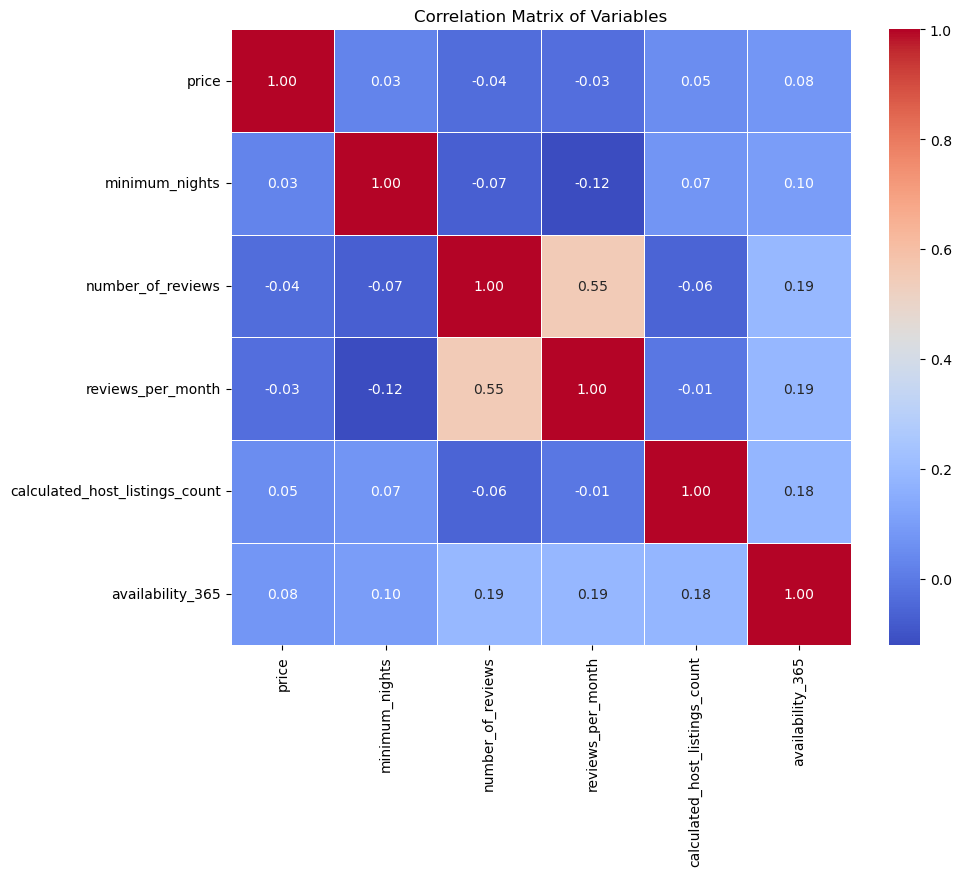

In [13]:
# Selecting the variables of interest
selected_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                    'calculated_host_listings_count', 'availability_365']
# Creating the correlation matrix
correlation_matrix = df[selected_columns].corr()

# Visualizing the correlation matrix using Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Adding titles and labels for clarity
plt.title('Correlation Matrix of Variables')
plt.show()

### Interpretation

The correlation matrix shows the relationships between Price, Amount of Nights Minimum, Number of Reviews, Number of Reviews per Month, Amount of Listing per Host, Listing Availability per Year. Overall, most of the correlations shown are weak, indicating that there is no strong relationship between these variables. The strongest relationship is between Reviews per Month and Number of Reviews (with a correlation of 0.55), which makes sense since more reviews mean higher popularity, which translates into higher reviews per month. This correlation matrix is helpful for understanding the relationships between different aspects of Airbnb listings.

## Conclusion

In this project, I did a comprehensive analysis of Airbnb listings in New York City to analyse the patterns and dynamics within the market. I created a few distribution graphs, including Distribution of Listings Across Neighbourhood Groups and Room Types, and Average AirBnB Price and Average Reviews per Month Across Neighbourhood Groups and Room Types. Furthermore, I created Histograms for Price, Amount of Nights Minimum, Number of Reviews, Number of Reviews per Month, Amount of Listing per Host, Listing Availability per Year, to further understand the frequency and distribution of my key variables. Lastly, I created scatter plots to present Relationship between Price and Amount of Nights Minimum, Number of Reviews, Number of Reviews per Month, Amount of Listing per Host, Listing Availability per Year; and Correlation Matrix between all key variables to further interpret any correlation. 

Overall, the findings show that entire homes/apartments are the most popular room type, while Manhattan is the most popular area with the highest number of listings. Subsequently, entire homes/apartments room type and Manhattan area have listings with higher-end prices. Most histograms are rightly skewed, with a higher frequency of listings that have low prices, a low minimum night requirement, a low number of reviews, a low number of reviews per month, and a low number of listings per host. The relationships between Price and Amount of Nights Minimum, Number of Reviews, Number of Reviews per Month, Amount of Listing per Host, and Listing Availability per Year are very weak, suggesting that I am unable to determine the impact of reviews on AirBnB listing prices in NYC using this dataset and in this first project.

In further steps, more datasets should be merged, and more statistical techniques should be utilised to answer the research question.

## Maps